# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Matthew Lett
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [22]:
# Set the base url to be reused
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# set up lists to hold reponse info
latitude = []
longitude = []
max_temperature = []
humidity = []
cloud_coverage = []
windspeed = []
country = []
city_datetime = []
weather_description = []

# Set a counter
index = 0

# Loop through the list of cities and perform a request for data on each
for city in cities:
    
    # display which city we are retrieving results for
    print(f'Getting results for {city} ({index + 1})')
    
    # build the request url
    query_url = f'{base_url}appid={weather_api_key}&q={city}&units=imperial'
    
    # execute the request
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()

    # set up exception handling incase the city is not available
    try:
        # append the values into their respective lists
        latitude.append(weather_json['coord']['lat'])
        longitude.append(weather_json['coord']['lon'])
        max_temperature.append(weather_json['main']['temp_max'])
        humidity.append(weather_json['main']['humidity'])
        cloud_coverage.append(weather_json['main']['humidity'])
        windspeed.append(weather_json['wind']['speed'])
        country.append(weather_json['sys']['country'])
        city_datetime.append(pd.to_datetime(weather_json['dt'], unit='s'))
        weather_description.append(weather_json['weather'][0]['description'])
        
    except (KeyError, IndexError):
        # handle an unavailable city
        print(f'No available data for {city}')
        latitude.append(np.nan)
        longitude.append(np.nan)
        max_temperature.append(np.nan)
        humidity.append(np.nan)
        cloud_coverage.append(np.nan)
        windspeed.append(np.nan)
        country.append(np.nan)
        city_datetime.append(np.nan)
        weather_description.append(np.nan)
    
    #increment the counter
    index += 1


Getting results for okato (1)
Getting results for eureka (2)
Getting results for ushuaia (3)
Getting results for mataura (4)
Getting results for xinqing (5)
Getting results for moron (6)
Getting results for avarua (7)
Getting results for tumsar (8)
Getting results for nanortalik (9)
Getting results for busselton (10)
Getting results for batagay-alyta (11)
Getting results for beringovskiy (12)
Getting results for grand river south east (13)
No available data for grand river south east
Getting results for bathsheba (14)
Getting results for isangel (15)
Getting results for awjilah (16)
Getting results for punta arenas (17)
Getting results for hilo (18)
Getting results for hithadhoo (19)
Getting results for illoqqortoormiut (20)
No available data for illoqqortoormiut
Getting results for airai (21)
Getting results for powell (22)
Getting results for karratha (23)
Getting results for baker city (24)
Getting results for pevek (25)
Getting results for rikitea (26)
Getting results for lukovetsk

Getting results for sur (217)
Getting results for gvarv (218)
Getting results for komsomolskiy (219)
Getting results for kahului (220)
Getting results for kruisfontein (221)
Getting results for deshnok (222)
Getting results for maracaibo (223)
Getting results for nuuk (224)
Getting results for mangai (225)
Getting results for gangotri (226)
No available data for gangotri
Getting results for kapaa (227)
Getting results for nortelandia (228)
Getting results for poum (229)
Getting results for hesla (230)
Getting results for saryshagan (231)
No available data for saryshagan
Getting results for kachikau (232)
No available data for kachikau
Getting results for rocha (233)
Getting results for panama city (234)
Getting results for kodiak (235)
Getting results for atyrau (236)
Getting results for arcata (237)
Getting results for belushya guba (238)
No available data for belushya guba
Getting results for serebryanyy bor (239)
Getting results for rudnogorsk (240)
Getting results for asau (241)
Ge

Getting results for kargasok (433)
Getting results for flinders (434)
Getting results for acuna (435)
No available data for acuna
Getting results for kimberley (436)
Getting results for kuche (437)
No available data for kuche
Getting results for cordoba (438)
Getting results for ankazoabo (439)
Getting results for solano (440)
Getting results for duekoue (441)
Getting results for aklavik (442)
Getting results for ono (443)
Getting results for san policarpo (444)
Getting results for ayan (445)
Getting results for valparaiso (446)
Getting results for snina (447)
Getting results for shingu (448)
Getting results for san quintin (449)
Getting results for pisco (450)
Getting results for dong hoi (451)
Getting results for smithers (452)
Getting results for salekhard (453)
Getting results for vestmanna (454)
Getting results for kilinochchi (455)
Getting results for senmonorom (456)
No available data for senmonorom
Getting results for santa cruz (457)
Getting results for the pas (458)
Getting r

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [23]:
# create a dataframe with the results
city_data_df= pd.DataFrame({
    'City':cities,
    'Latitude':latitude,
    'Longitude':longitude,
    'Max Temperature':max_temperature,
    'Humidity':humidity,
    'Cloud Coverage':cloud_coverage,
    'Windspeed':windspeed,
    'Country':country,
    'City Date Time':city_datetime,
    'Weather Description':weather_description
})

# output the results to a csv file
city_data_df.to_csv('Output/City_Output.csv', index=False, header=True)

# display the results
city_data_df.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloud Coverage,Windspeed,Country,City Date Time,Weather Description
0,okato,-39.2000,173.8833,51.69,86.0,86.0,4.61,NZ,2021-07-24 04:51:50,few clouds
1,eureka,40.8021,-124.1637,56.35,78.0,78.0,1.01,US,2021-07-24 04:50:02,clear sky
2,ushuaia,-54.8000,-68.3000,37.06,75.0,75.0,5.75,AR,2021-07-24 04:50:39,light rain
3,mataura,-46.1927,168.8643,44.56,87.0,87.0,3.38,NZ,2021-07-24 04:53:03,scattered clouds
4,xinqing,48.2333,129.5000,92.30,33.0,33.0,12.33,CN,2021-07-24 04:53:04,few clouds


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
# remove any cities we do not have information for
city_data_removed_nan_df = city_data_df.dropna(inplace=False, how='any')
print(f'Removed {len(city_data_df) - len(city_data_removed_nan_df)} records')

Removed 51 records


In [6]:
#  Get the indices of cities that have humidity over 100%.
index = city_data_removed_nan_df.index
condition = city_data_removed_nan_df['Humidity'] > 100
indexes = index[condition]
index_list = indexes.tolist()
index_list

[]

In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data_removed_nan_df.drop(index_list, inplace=False)
clean_city_data

,City,Latitude,Longitude,Max Temperature,Humidity,Cloud Coverage,Windspeed,Country,City Date Time,Weather Description
0,okato,-39.2000,173.8833,52.68,86.0,86.0,4.61,NZ,1.627101e+09,few clouds
1,eureka,40.8021,-124.1637,56.35,78.0,78.0,1.01,US,1.627101e+09,clear sky
2,ushuaia,-54.8000,-68.3000,37.06,75.0,75.0,5.75,AR,1.627101e+09,light rain
3,mataura,-46.1927,168.8643,44.56,87.0,87.0,3.38,NZ,1.627101e+09,scattered clouds
4,xinqing,48.2333,129.5000,92.30,33.0,33.0,12.33,CN,1.627101e+09,few clouds
...,...,...,...,...,...,...,...,...,...,...
622,ombessa,4.6030,11.2565,67.91,98.0,98.0,2.75,CM,1.627102e+09,overcast clouds
623,abha,18.2164,42.5053,62.85,77.0,77.0,0.00,SA,1.627102e+09,scattered clouds
624,karatau,43.1667,70.4667,93.27,15.0,15.0,5.41,KZ,1.627101e+09,clear sky
625,estreito,-5.7833,-43.2500,66.61,47.0,47.0,5.61,BR,1.627102e+09,clear sky


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

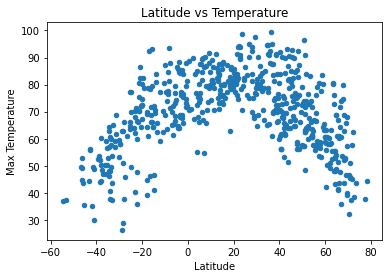

In [8]:
# Plot the values and save the results
clean_city_data.plot('Latitude', 'Max Temperature', kind='scatter', title='Latitude vs Temperature', xlabel='Latitude', ylabel='Max Temperature')
plt.savefig('Output/Latitude_vs_Temp.png')
plt.show()
print('This measures the max temperature and compares it to the latitude of the city.')

## Latitude vs. Humidity Plot

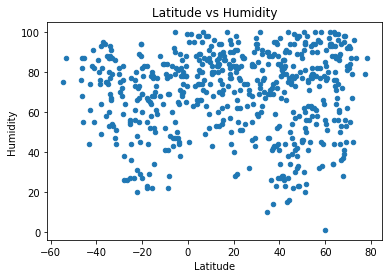

In [9]:
# Plot the values and save the results
clean_city_data.plot('Latitude', 'Humidity', kind='scatter', title='Latitude vs Humidity', xlabel='Latitude', ylabel='Humidity')
plt.savefig('Output/Latitude_vs_Humidity.png')
plt.show()
print('Humidity based on city latitude')

## Latitude vs. Cloudiness Plot

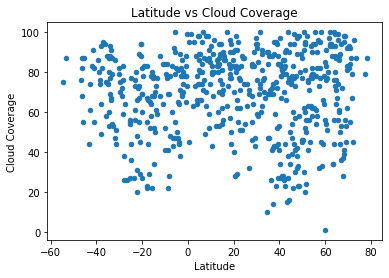

In [10]:
# Plot the values and save the results
clean_city_data.plot('Latitude', 'Cloud Coverage', kind='scatter', title='Latitude vs Cloud Coverage', xlabel='Latitude', ylabel='Cloud Coverage')
plt.savefig('Output/Latitude_vs_Cloud_Coverage.png')
plt.show()
print(f'Cloud coverage based on city latitude')

## Latitude vs. Wind Speed Plot

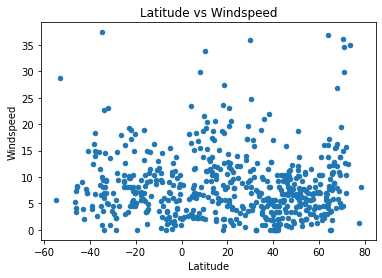

In [11]:
# Plot the values and save the results
clean_city_data.plot('Latitude', 'Windspeed', kind='scatter', title='Latitude vs Windspeed', xlabel='Latitude', ylabel='Windspeed')
plt.savefig('Output/Latitude_vs_Windspeed.png')
plt.show()
print(f'Windspeed based on city latitude')

## Linear Regression

In [12]:
# create dataframe for the specific hemispheres
northern_hemisphere = clean_city_data.loc[clean_city_data['Latitude'] > 0]
southern_hemisphere = clean_city_data.loc[clean_city_data['Latitude'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.38742673271769684


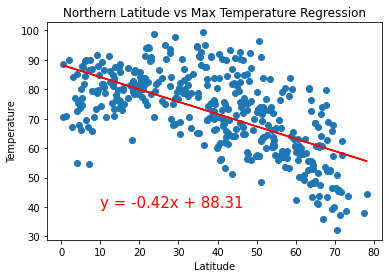

In [13]:
# Plot the values with regression and save the results
x_values = northern_hemisphere['Latitude']
y_values = northern_hemisphere['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Northern Latitude vs Max Temperature Regression')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('Output/Northern_Latitude_vs_Max_Temp_Regression.png')
plt.show()
print(f'based on the current image. the farther north the cooler the temperature')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.48412289048486296


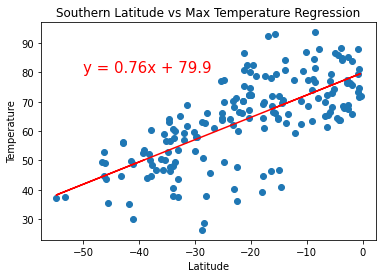

In [14]:
# Plot the values with regression and save the results
x_values = southern_hemisphere['Latitude']
y_values = southern_hemisphere['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Southern Latitude vs Max Temperature Regression')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('Output/Southern_Latitude_vs_Max_Temp_Regression.png')
plt.show()
print(f'Based on the current image. the farther south the cooler the temperature')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.011863181472276628


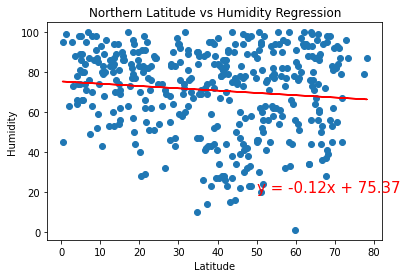

In [15]:
# Plot the values with regression and save the results
x_values = northern_hemisphere['Latitude']
y_values = northern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Latitude vs Humidity Regression')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('Output/Northern_Latitude_vs_Humidity_Regression.png')
plt.show()
print(f'Humidity remains fairly consistent in the northern hemisphere')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.009661278648818248


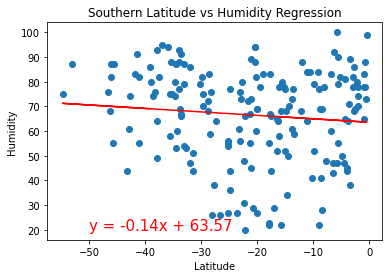

In [16]:
# Plot the values with regression and save the results
x_values = southern_hemisphere['Latitude']
y_values = southern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Latitude vs Humidity Regression')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('Output/Southern_Latitude_vs_Humidity_Regression.png')
plt.show()
print(f'Humidity remains fairly consistent in the southern hemisphere')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.011863181472276628


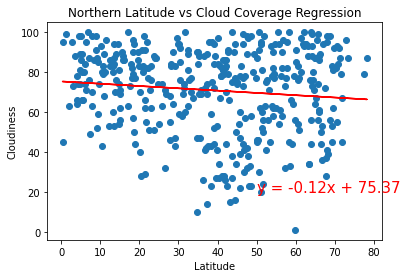

In [17]:
# Plot the values with regression and save the results
x_values = northern_hemisphere['Latitude']
y_values = northern_hemisphere['Cloud Coverage']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Latitude vs Cloud Coverage Regression')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('Output/Northern_Latitude_vs_Cloud_Coverage_Regression.png')
plt.show()
print(f'Cloud coverage seems to follow the humidity levels')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.009661278648818248


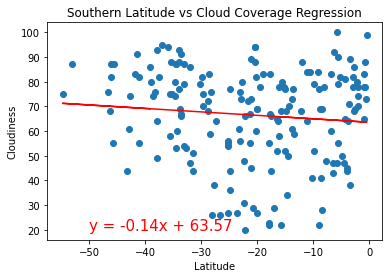

In [18]:
# Plot the values with regression and save the results
x_values = southern_hemisphere['Latitude']
y_values = southern_hemisphere['Cloud Coverage']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Latitude vs Cloud Coverage Regression')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('Output/Southern_Latitude_vs_Cloud_Coverage_Regression.png')
plt.show()
print(f'Cloud coverage seems to follow the humidity levels')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.001669651122828523


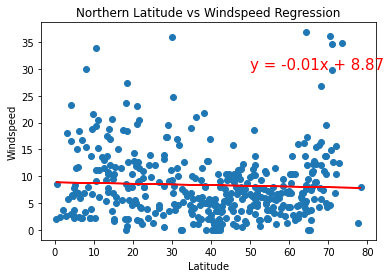

In [19]:
# Plot the values with regression and save the results
x_values = northern_hemisphere['Latitude']
y_values = northern_hemisphere['Windspeed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Windspeed')
plt.title('Northern Latitude vs Windspeed Regression')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('Output/Northern_Latitude_vs_Windspeed_Regression.png')
plt.show()
print(f'Windspeed has remains consistent across latitudes. And it does not appear latitude influences windspeed')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03639841834152153


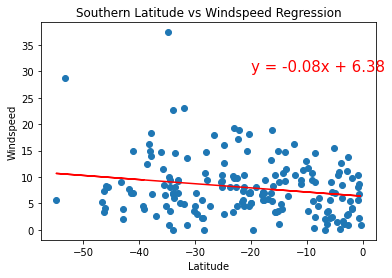

In [20]:
# Plot the values with regression and save the results
x_values = southern_hemisphere['Latitude']
y_values = southern_hemisphere['Windspeed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Windspeed')
plt.title('Southern Latitude vs Windspeed Regression')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('Output/Southern_Latitude_vs_Windspeed_Regression.png')
plt.show()
print(f'Windspeed has decreases slightly the closer to the equator you get.')